In [39]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from codigos import extract_features, cross_validation, grid_search, preprocessing
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
def metricas(model,X_train, y_train, X_test, y_test):
    
    y_prob_train = model.predict_proba(X_train)[:,1]
    y_prob_test  = model.predict_proba(X_test)[:,1]

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    auc_train = roc_auc_score(y_train, y_prob_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    matrix_train = confusion_matrix(y_train, y_pred_train)

    auc_test = roc_auc_score(y_test, y_prob_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    matrix_test = confusion_matrix(y_test, y_pred_test)
    
    resultados = {
        'auc_tr'	   : [auc_train], 
        'accuracy_tr'  : [accuracy_train],
        'precision_tr' : [precision_train],
        'recall_tr'	   : [recall_train],
        'f1_tr'		   : [f1_train],
        'Matriz_tr'    : [matrix_train],
        'auc_te'	   : [auc_test], 
        'accuracy_te'  : [accuracy_test],
        'precision_te' : [precision_test],
        'recall_te'	   : [recall_test],
        'f1_te'		   : [f1_test],
        'Matriz_te'    : [matrix_test]
    }

    res_df = pd.DataFrame.from_dict(resultados)
    
    return res_df

In [31]:
model1 = lgb.LGBMClassifier(learning_rate = 0.14775510204081632,
                            n_estimators = 83,
                            max_depth = 18,
                            min_data_in_leaf = 95,
                            n_jobs = -3,
                            verbose = -1,
                            seed = 42)

In [32]:
model2 = RandomForestClassifier(n_estimators = 42,
                                max_depth = 39,
                                criterion = 'gini',
                                min_samples_leaf = 51,
                                n_jobs = -3,
                                random_state = 42)

In [33]:
model3 = RandomForestClassifier(n_estimators = 56,
                                max_depth = 22,
                                criterion = 'entropy',
                                min_samples_leaf = 76,
                                n_jobs = -3,
                                random_state = 42)

In [5]:
path1 = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo1"
path2 = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo2"
path3 = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo3"

In [8]:
x_train_1, y_train_1, x_test_1, y_test_1 = extract_features.features_resnet(path1)

******************************************************************** 
Extracción de caracteristicas por medio de RESNET
******************************************************************** 
Labels: ['cataratas' 'normal']
Labels encoded: [0 1]
******************************************************************** 
Extracción de caracteristicas por medio de RESNET finalizada
******************************************************************** 


In [9]:
x_train_2, y_train_2, x_test_2, y_test_2 = extract_features.features_resnet(path2)

******************************************************************** 
Extracción de caracteristicas por medio de RESNET
******************************************************************** 
Labels: ['glaucoma' 'normal']
Labels encoded: [0 1]
******************************************************************** 
Extracción de caracteristicas por medio de RESNET finalizada
******************************************************************** 


In [10]:
x_train_3, y_train_3, x_test_3, y_test_3 = extract_features.features_vgg16(path3)

******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16
******************************************************************** 
Labels: ['normal' 'retinopatia']
Labels encoded: [0 1]
6/6 [==============================] - 15s 3s/step
******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16 finalizada
******************************************************************** 


In [34]:
model1.fit(x_train_1,y_train_1)

[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95


LGBMClassifier(learning_rate=0.14775510204081632, max_depth=18,
               min_data_in_leaf=95, n_estimators=83, n_jobs=-3, seed=42,
               verbose=-1)

In [35]:
model2.fit(x_train_2,y_train_2)

RandomForestClassifier(max_depth=39, min_samples_leaf=51, n_estimators=42,
                       n_jobs=-3, random_state=42)

In [36]:
model3.fit(x_train_3,y_train_3)

RandomForestClassifier(criterion='entropy', max_depth=22, min_samples_leaf=76,
                       n_estimators=56, n_jobs=-3, random_state=42)

In [37]:
metricas_m1 = metricas(model1, x_train_1, y_train_1, x_test_1, y_test_1)
metricas_m2 = metricas(model2, x_train_2, y_train_2, x_test_2, y_test_2)
metricas_m3 = metricas(model3, x_train_3, y_train_3, x_test_3, y_test_3)

In [38]:
pd.concat([metricas_m1,metricas_m2,metricas_m3],axis=0)

,auc_tr,accuracy_tr,precision_tr,recall_tr,f1_tr,Matriz_tr,auc_te,accuracy_te,precision_te,recall_te,f1_te,Matriz_te
0,1.000000,1.000000,1.000000,1.000000,1.000000,"[[271, 0], [0, 271]]",0.991668,0.939560,0.944444,0.934066,0.939227,"[[86, 5], [6, 85]]"
0,0.916661,0.839286,0.833724,0.847619,0.840614,"[[349, 71], [64, 356]]",0.877449,0.814286,0.818841,0.807143,0.812950,"[[115, 25], [27, 113]]"
0,0.898321,0.795290,0.859031,0.706522,0.775348,"[[244, 32], [81, 195]]",0.886808,0.817204,0.864198,0.752688,0.804598,"[[82, 11], [23, 70]]"


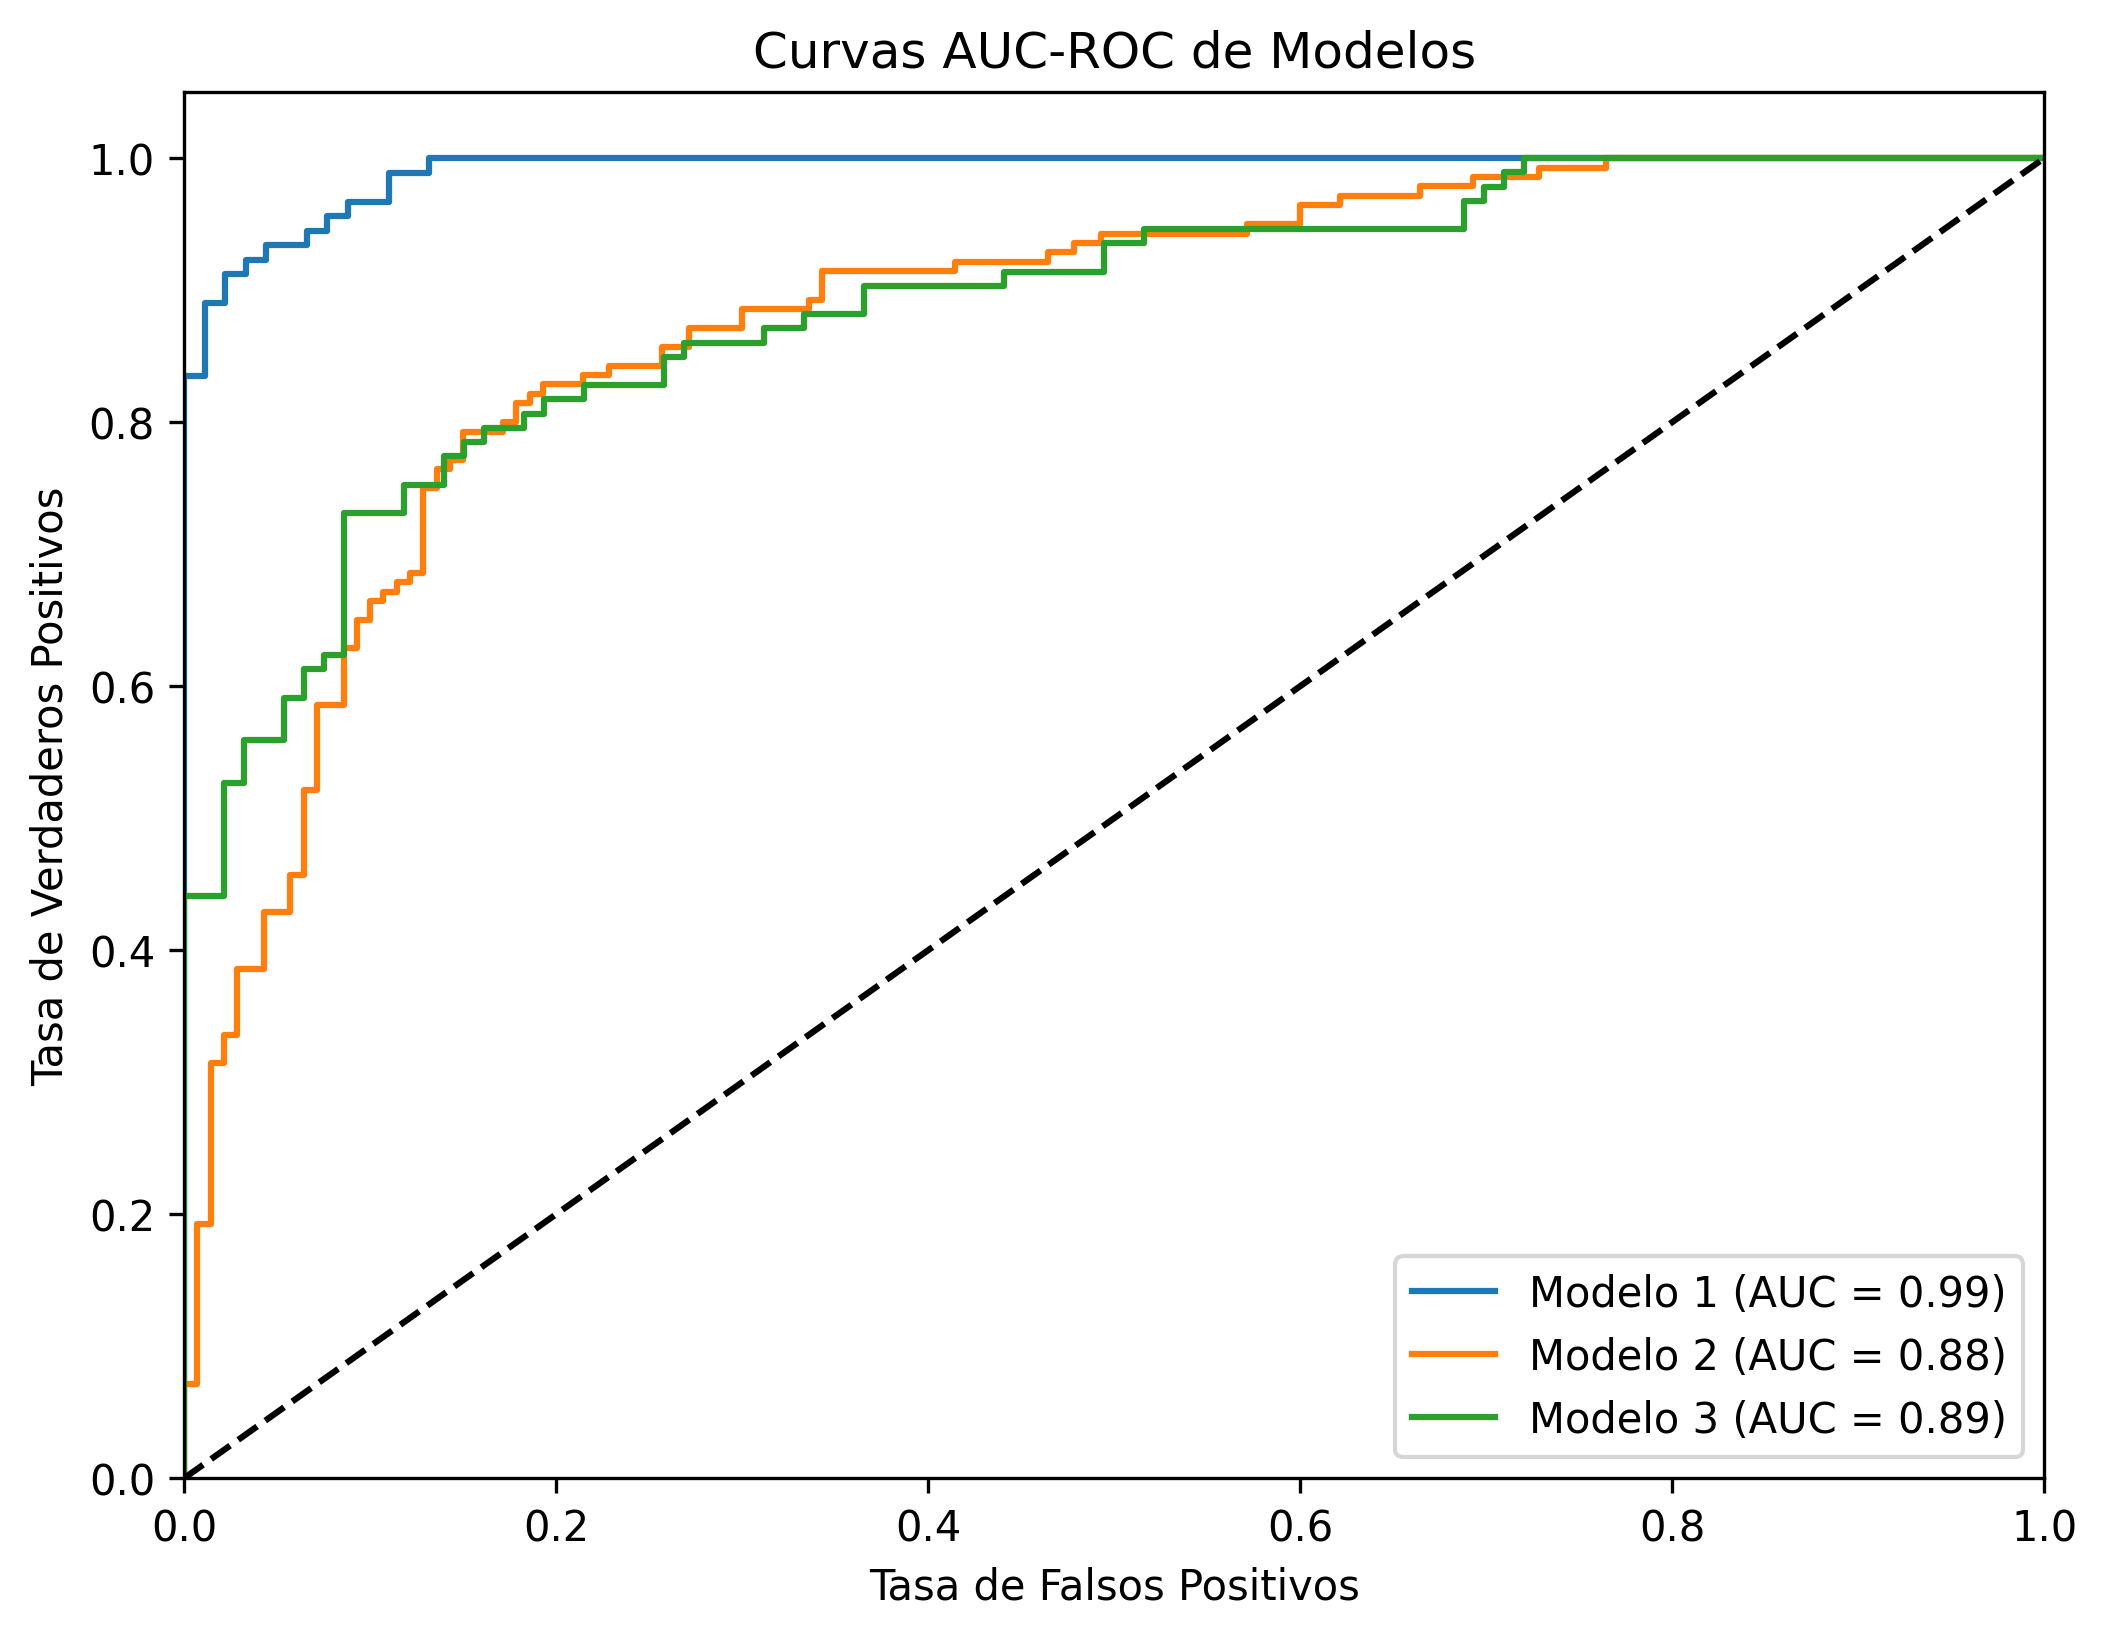

In [49]:
# Obtener las probabilidades de predicción para los datos de prueba
y_probs1 = model1.predict_proba(x_test_1)[:, 1]
y_probs2 = model2.predict_proba(x_test_2)[:, 1]
y_probs3 = model3.predict_proba(x_test_3)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales para cada modelo
fpr1, tpr1, _ = roc_curve(y_test_1, y_probs1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_2, y_probs2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test_3, y_probs3)
roc_auc3 = auc(fpr3, tpr3)

# Graficar las curvas AUC-ROC
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr1, tpr1, label='Modelo 1 (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Modelo 2 (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Modelo 3 (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas AUC-ROC de Modelos')
plt.legend(loc="lower right")
plt.savefig('auc_roc_plot.png', dpi=300)  # Guardar la figura con mayor resolución
plt.show()